In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16-12-2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16-12-2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16-12-2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16-12-2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16-12-2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [4]:
data.shape

(1048574, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048574 non-null  object 
 1   Time                   1048574 non-null  object 
 2   Global_active_power    1048574 non-null  object 
 3   Global_reactive_power  1048574 non-null  object 
 4   Voltage                1048574 non-null  object 
 5   Global_intensity       1048574 non-null  object 
 6   Sub_metering_1         1048574 non-null  object 
 7   Sub_metering_2         1048574 non-null  object 
 8   Sub_metering_3         1044505 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


In [6]:
data.describe()

,Sub_metering_3
count,1.044505e+06
mean,5.933842e+00
std,8.210400e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [7]:
data.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,4069


In [8]:
data["Sub_metering_3"].unique()

array([17., 16., 18.,  9.,  0.,  5., 19., 10., 20.,  8.,  4.,  2.,  3.,
       11., 13.,  6., 15., nan, 12.,  1., 14.,  7., 23., 25., 26., 28.,
       27., 21., 22., 29., 24., 30., 31.])

In [9]:
data.dropna(subset=["Sub_metering_3" ], inplace = True)

In [10]:
data.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [11]:
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], dayfirst=True)
data.set_index('Datetime', inplace=True)

data['Hour'] = data.index.hour
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Weekday'] = data.index.weekday


In [12]:
data.drop(['Date','Time'], axis=1, inplace=True)


In [13]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day,Month,Weekday
Datetime,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0,1,17.0,17,16,12,5
2006-12-16 17:25:00,5.36,0.436,233.63,23,0,1,16.0,17,16,12,5
2006-12-16 17:26:00,5.374,0.498,233.29,23,0,2,17.0,17,16,12,5
2006-12-16 17:27:00,5.388,0.502,233.74,23,0,1,17.0,17,16,12,5
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0,1,17.0,17,16,12,5


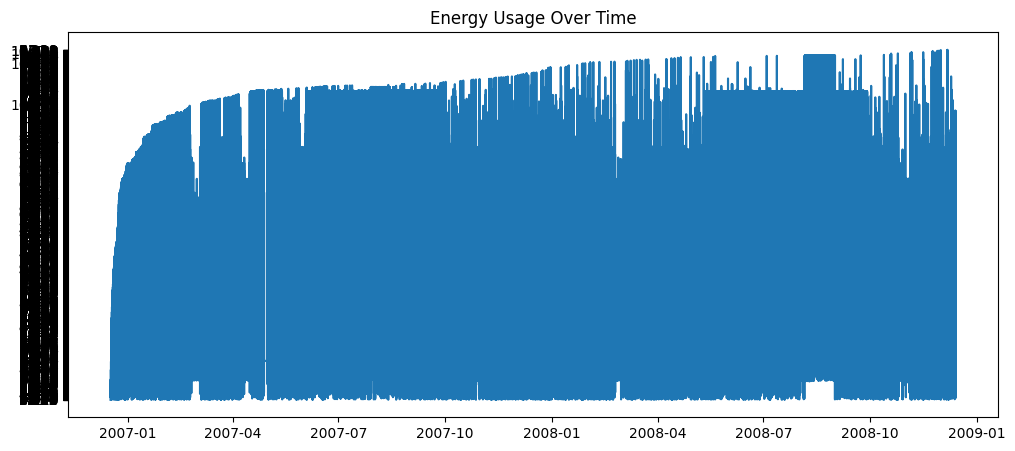

In [14]:
plt.figure(figsize=(12,5))
plt.plot(data.index, data['Global_active_power'])
plt.title("Energy Usage Over Time")
plt.show()

In [15]:
data.replace('?', np.nan, inplace=True)

for col in data.columns:
    if col not in ['Date', 'Time']:
        data[col] = pd.to_numeric(data[col])


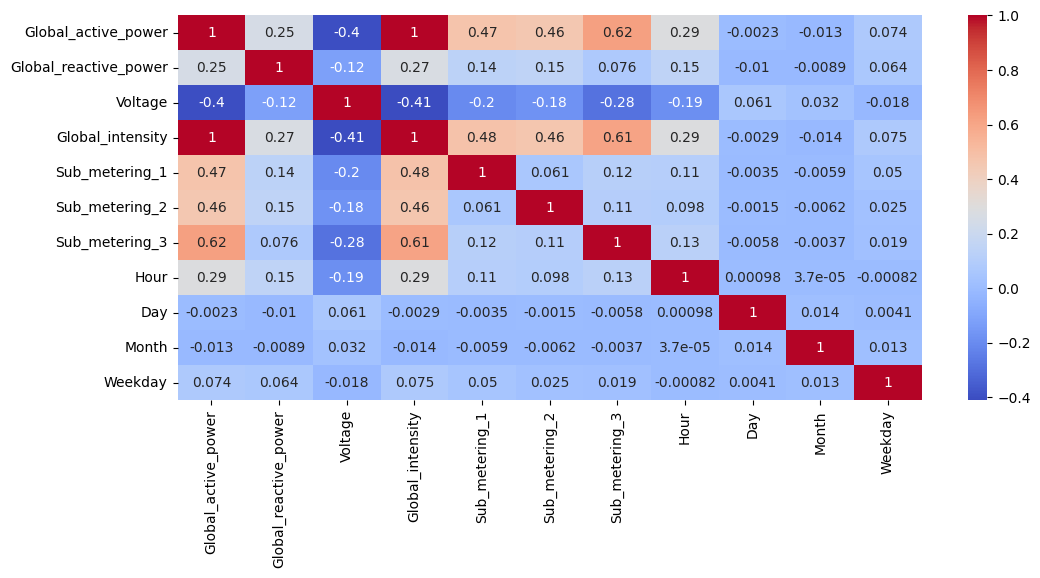

In [16]:
#Heatmap

plt.figure(figsize=(12,5))
sns.heatmap(data.corr(), cmap = "coolwarm" , annot = True)
plt.show()

In [17]:
data.drop("Global_intensity" , inplace=True , axis=1)

In [18]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Hour', 'Day',
       'Month', 'Weekday'],
      dtype='object')

In [19]:
val = data.drop("Global_active_power" , axis = 1 )
tar = data["Global_active_power"]

In [20]:
traindata ,testdata ,trainlab , testlab = train_test_split(val , tar , test_size=0.2 , random_state=42)

In [21]:
model = LinearRegression()
model.fit(traindata , trainlab)

LinearRegression()

In [22]:
tr_pred_lr = model.predict(traindata)
te_pred_lr = model.predict(testdata)

In [23]:
mean_squared_error(trainlab , tr_pred_lr)

0.3458868733884163

In [24]:
mean_squared_error(testlab , te_pred_lr)

0.35011369460345737

In [25]:
root_mean_squared_error(trainlab , tr_pred_lr)

0.5881214784280678

In [26]:
root_mean_squared_error(testlab , te_pred_lr)

0.5917040599856126

In [27]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

In [28]:
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [29]:
model.fit(traindata , trainlab)

RandomForestRegressor(random_state=42)

In [30]:
best_model = model

In [31]:
tr_pred_rf = model.predict(traindata)
te_pred_rf = model.predict(testdata)

In [32]:
mean_squared_error(trainlab , tr_pred_rf)

0.007114798476949603

In [33]:
mean_squared_error(testlab , te_pred_rf)

0.05178253643102265

In [34]:
root_mean_squared_error(trainlab , tr_pred_rf)

0.08434926482755853

In [35]:
root_mean_squared_error(testlab , te_pred_rf)

0.22755776504224737

In [36]:
#GradiantBoost

In [37]:
model = GradientBoostingRegressor(random_state=42)
model.fit(traindata , trainlab)

GradientBoostingRegressor(random_state=42)

In [38]:
tr_pred_gb = model.predict(traindata)
te_pred_gb = model.predict(testdata)

In [39]:
root_mean_squared_error(trainlab , tr_pred_gb)

0.4662292496387442

In [40]:
root_mean_squared_error(testlab , te_pred_gb)

0.4695996962257749

In [41]:
mean_squared_error(trainlab , tr_pred_gb)

0.21736971321870643

In [42]:
mean_squared_error(testlab , te_pred_gb)

0.2205238746953401

In [43]:
print("Final RMSE:", np.sqrt(mean_squared_error(testlab,te_pred_rf)))
print("Final MAE:", mean_absolute_error(testlab,te_pred_rf))
print("Final R2:", r2_score(testlab,te_pred_rf))

Final RMSE: 0.22755776504224737
Final MAE: 0.09170141435653015
Final R2: 0.9598582970001253


In [44]:
importances = best_model.feature_importances_

feat_imp = pd.DataFrame({
    "Feature":val.columns,
    "Importance":importances
}).sort_values("Importance",ascending=False)

feat_imp.head(10)

,Feature,Importance
4,Sub_metering_3,0.405923
2,Sub_metering_1,0.159915
3,Sub_metering_2,0.140306
5,Hour,0.075748
1,Voltage,0.057125
7,Month,0.051538
6,Day,0.049072
0,Global_reactive_power,0.035595
8,Weekday,0.024777


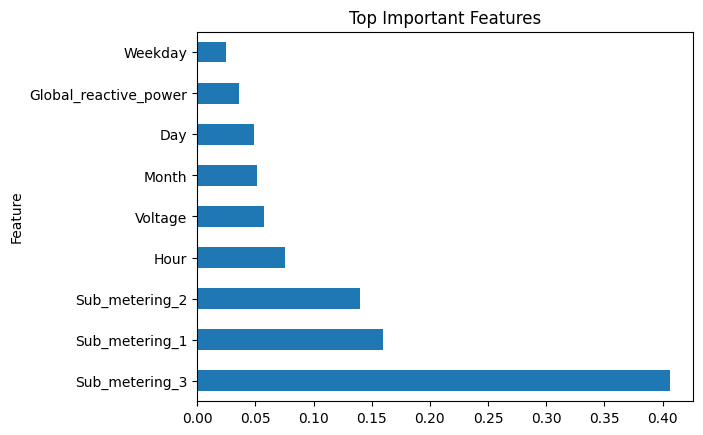

In [45]:
feat_imp.head(10).plot(
    x="Feature",
    y="Importance",
    kind="barh",
    legend=False,
    title="Top Important Features"
)
plt.show()

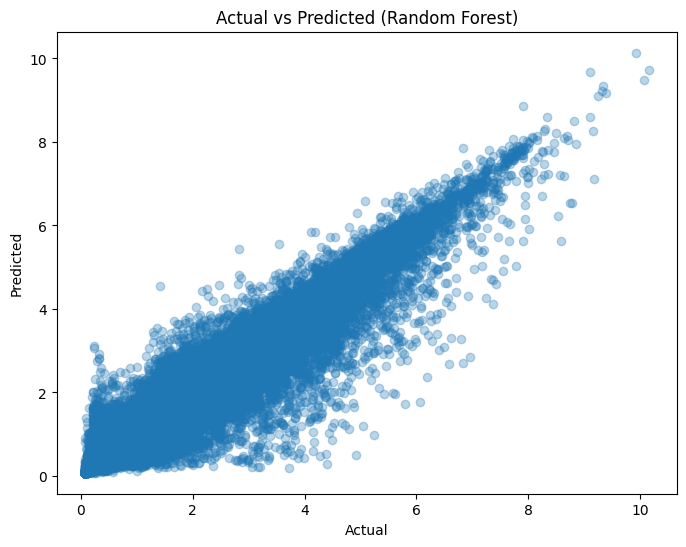

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(testlab, te_pred_rf, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()
